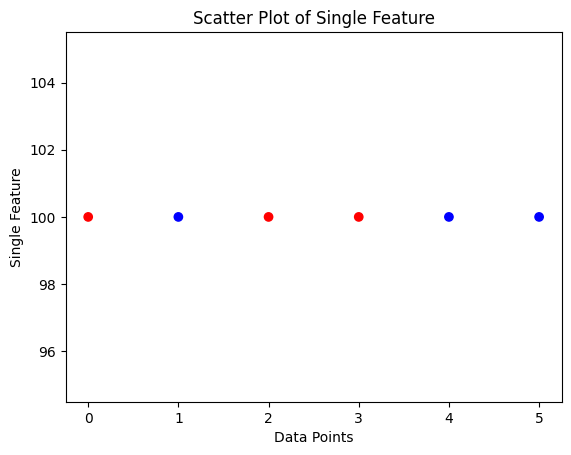

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the dataset
data = {
    'Flour': [40, 40, 45, 38, 40, 45],
    'Milk': [20, 18, 15, 20, 25, 15],
    'Butter': [6, 5, 6, 5, 7, 5],
    'Sugar': [20, 22, 19, 15, 15, 17],
    'Egg': [5, 7, 5, 10, 5, 9],
    'Powder': [5, 5, 5, 8, 5, 6],
    'Salt': [4, 3, 5, 4, 3, 3],
    'Recipe': ['Muffin', 'Cupcake', 'Muffin', 'Muffin', 'Cupcake', 'Cupcake']
}


# Compute a single feature by summing all features
single_feature = np.sum(list(data.values())[:-1], axis=0)  # Exclude the 'Recipe' column

# Separate the data
X = single_feature
colors = ['red' if r == 'Muffin' else 'blue' for r in data['Recipe']]

# Plot the data points
plt.scatter(range(len(X)), X, c=colors)

# Set labels and title
plt.xlabel('Data Points')
plt.ylabel('Single Feature')
plt.title('Scatter Plot of Single Feature')

# Show the plot
plt.show()

df = pd.DataFrame(data)

# Convert recipe labels to numerical values
df['Recipe'] = df['Recipe'].map({'Muffin': 0, 'Cupcake': 1})

# Split the dataset into features (X) and labels (y)
X = df.drop('Recipe', axis=1)
y = df['Recipe']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose an appropriate kernel function
# In this case, we will try the RBF (Radial Basis Function) kernel
kernel = 'rbf'

# Step 5: Train the SVM model
model = SVC(kernel=kernel)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))